In [71]:
from googletrans import Translator
import pandas as pd
import numpy as np
import Levenshtein
import matplotlib.pyplot as plt
import seaborn as sns
from deep_translator import GoogleTranslator
import textstat

#pip install googletrans==3.1.0a0
#https://stackoverflow.com/questions/52455774/googletrans-stopped-working-with-error-nonetype-object-has-no-attribute-group

In [23]:
translated = GoogleTranslator(source='en', target='es').translate("keep it up, you are awesome")
# output -> Weiter so, du bist großartig

In [26]:
def translate(to_translate, src, dest):
    return(GoogleTranslator(source=src, target=dest).translate(to_translate))


def measure_backtranslation(to_translate, src_language, dest_language):
    forward_translation = translate(to_translate, src_language, dest_language)
    back_translation = translate(
        forward_translation, dest_language, src_language)
    distance = Levenshtein.distance(to_translate.lower(), back_translation.lower())
    return(to_translate, forward_translation, back_translation, distance)

In [242]:
ls data

en-es-sorted-en.txt     en-es.tmx               en-fr-sorted-pairs.txt
en-es-sorted-es.txt     en-fr-sorted-en.txt     en-fr.tmx
en-es-sorted-pairs.txt  en-fr-sorted-fr.txt


In [33]:
## Handling the English Sentences from the En Es translations

In [34]:
with open('data/en-es-sorted-en.txt') as f:
    lines = f.readlines()

In [35]:
en_es_en = pd.DataFrame(data = {'Phrase':lines})

In [36]:
en_es_en['Phrase'] = en_es_en['Phrase'].str[:-1]

In [37]:
en_es_en['PhraseLength'] = en_es_en.apply(lambda row: len(row['Phrase']), axis = 1)

In [38]:
def word_count(row):
    return(len(row['Phrase'].split()))

In [39]:
en_es_en['WordCount'] = en_es_en.apply(lambda row: word_count(row), axis = 1)

In [40]:
en_es_en_sub = en_es_en[(en_es_en['WordCount'] >= 3) & (en_es_en['WordCount'] <= 20)]

<AxesSubplot:xlabel='WordCount', ylabel='Density'>

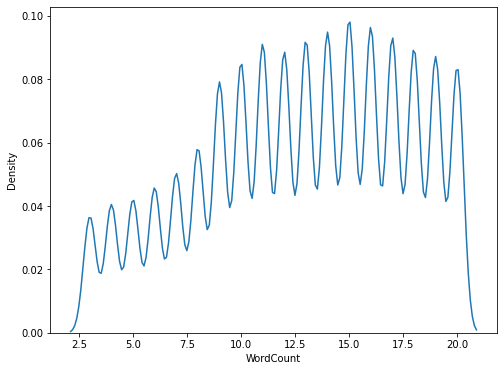

In [41]:
fig, ax = plt.subplots(figsize = (8,6))
sns.kdeplot(en_es_en_sub['WordCount'])

In [45]:
def alphanumeric_percent(row):
    letters = len([x for x in row['Phrase'] if x.isalpha()])
    return(letters/len(row['Phrase'].replace(' ','')))

In [46]:
en_es_en_sub['AlphaNumeric%'] = en_es_en_sub.apply(lambda row: alphanumeric_percent(row), axis = 1)

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
sub2 = en_es_en_sub[en_es_en_sub['AlphaNumeric%'] > 0.975]

In [52]:
to_translates = []
forward_translations = []
back_translations = []
distances = []
counter = 0

In [53]:
sub3 = sub2.iloc[:10000]

In [54]:
for idx, row in sub3[counter:].iterrows():
    if counter % 1000 == 0:
        print(counter)
    a,b,c,d = measure_backtranslation(row['Phrase'], 'en', 'es')
    to_translates.append(a)
    forward_translations.append(b)
    back_translations.append(c)
    distances.append(d)
    counter += 1

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [55]:
sub3['ForwardTranslation'] = forward_translations
sub3['BackTranslation'] = back_translations
sub3['EditDistance'] = distances

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [57]:
sub3.to_csv('EnglishSpanishBacktranslationResults.csv')

In [60]:
sub3.head()

,Phrase,PhraseLength,WordCount,AlphaNumeric%,ForwardTranslation,BackTranslation,EditDistance
22593,The MIT Press,13,3,1.0,La prensa del MIT,The MIT Press,0
26410,The Cerro Torre,15,3,1.0,El Cerro Torre,The Cerro Torre,0
30208,at Rolling Stone,16,3,1.0,en Rolling Stone,in Rolling Stone,2
32718,at the DCU Guide,16,4,1.0,en la Guía DCU,in the DCU Guide,2
33936,The Movie Archive,17,3,1.0,El archivo de películas,The movie archive,0


In [63]:
sub3['EditDistance%'] = sub3['EditDistance']/sub3['PhraseLength']

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='WordCount', ylabel='EditDistance%'>

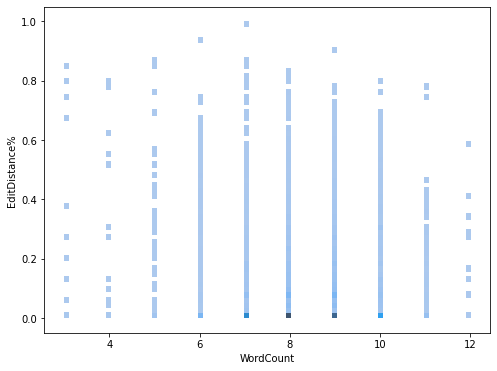

In [67]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = sub3['WordCount'], y = sub3['EditDistance%'])

In [80]:
sub3['Readability'] = sub3.apply(lambda row: textstat.flesch_reading_ease(row['Phrase']), axis = 1)
#The table is an example of values. While the maximum score is 121.22, there is no limit on how low
#the score can be. A negative score is valid. Higher score = easier to read
sub3['GradeLevel'] = sub3.apply(lambda row: textstat.flesch_kincaid_grade(row['Phrase']), axis = 1)
#Returns the Flesch-Kincaid Grade of the given text. This is a grade formula in that a score of 9.3
#means that a ninth grader would be able to read the document.

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [81]:
sub3.head()

,Phrase,PhraseLength,WordCount,AlphaNumeric%,ForwardTranslation,BackTranslation,EditDistance,EditDistance%,Readability,GradeLevel
22593,The MIT Press,13,3,1.0,La prensa del MIT,The MIT Press,0,0.000,119.19,-2.7
26410,The Cerro Torre,15,3,1.0,El Cerro Torre,The Cerro Torre,0,0.000,93.81,0.9
30208,at Rolling Stone,16,3,1.0,en Rolling Stone,in Rolling Stone,2,0.125,119.19,-2.7
32718,at the DCU Guide,16,4,1.0,en la Guía DCU,in the DCU Guide,2,0.125,118.18,-2.3
33936,The Movie Archive,17,3,1.0,El archivo de películas,The movie archive,0,0.000,93.81,0.9


In [82]:
sub3.groupby(['WordCount'], as_index = False).agg({'Phrase':'count', 'PhraseLength':'mean',
                                                   'EditDistance':'mean', 'EditDistance%':'mean',
                                                   'Readability':'mean', 'GradeLevel':'mean'})

,WordCount,Phrase,PhraseLength,EditDistance,EditDistance%,Readability,GradeLevel
0,3,30,20.833333,2.800000,0.142546,43.330333,7.943333
1,4,27,36.185185,5.074074,0.157640,25.742593,10.662963
2,5,110,44.000000,7.218182,0.168946,6.568364,13.575455
3,6,472,47.836864,5.925847,0.124417,18.752839,12.149364
4,7,1592,48.797111,5.479271,0.112337,43.844209,8.884108
5,8,3019,49.656840,5.719112,0.115164,61.115260,6.730010
6,9,2967,50.322548,6.346141,0.126126,76.624894,4.810347
7,10,1475,50.934915,6.754576,0.132552,85.187756,3.876136
8,11,285,51.442105,5.912281,0.114881,91.845368,3.184211
9,12,23,52.000000,7.217391,0.138796,100.128696,2.291304


Text(0.5, 1.0, 'Phrase Grade Level vs. Edit Distance as % of Phrase Length')

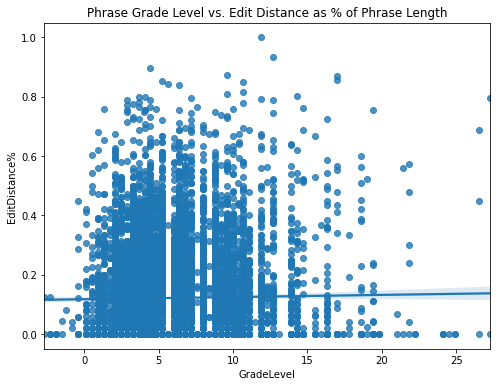

In [93]:
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = sub3['GradeLevel'], y = sub3['EditDistance%'])
plt.title('Phrase Grade Level vs. Edit Distance as % of Phrase Length')

Text(0.5, 1.0, 'Phrase Readability vs. Edit Distance as % of Phrase Length')

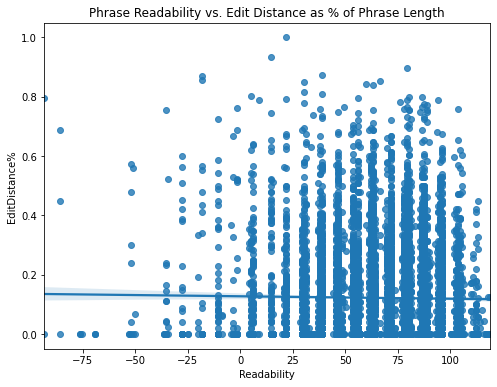

In [94]:
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = sub3['Readability'], y = sub3['EditDistance%'])
plt.title('Phrase Readability vs. Edit Distance as % of Phrase Length')

<AxesSubplot:xlabel='WordCount', ylabel='EditDistance%'>

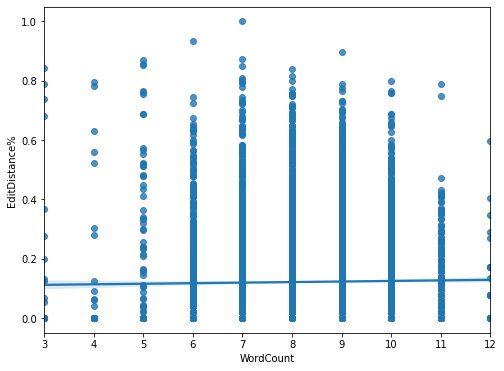

In [86]:
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = sub3['WordCount'], y = sub3['EditDistance%'])

<AxesSubplot:xlabel='PhraseLength', ylabel='EditDistance%'>

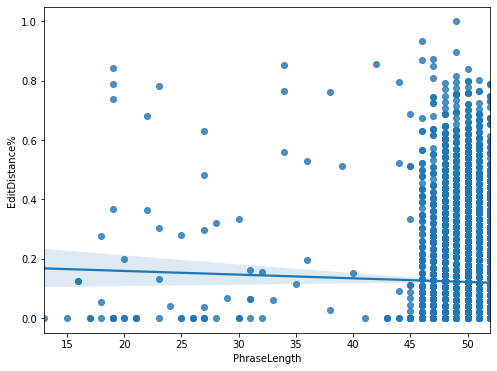

In [87]:
fig, ax = plt.subplots(figsize = (8,6))
sns.regplot(x = sub3['PhraseLength'], y = sub3['EditDistance%'])

In [97]:
sub3['ReadabilityBucket'] = np.where(sub3['Readability'] < 0, '< 0',
                            np.where(sub3['Readability'] < 20, '0 - 20',
                            np.where(sub3['Readability'] < 40, '20 - 40',
                            np.where(sub3['Readability'] < 60, '40 - 60',
                            np.where(sub3['Readability'] < 80, '60 - 80',
                            np.where(sub3['Readability'] < 100, '80 - 100', '100+'))))))

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [103]:
sub3.groupby(['ReadabilityBucket'], as_index = False).agg({'Phrase':'count','WordCount':'mean',
                                                           'PhraseLength':'mean', 'GradeLevel':'mean',
                                                           'EditDistance':'mean', 'EditDistance%':'mean'})

,ReadabilityBucket,Phrase,WordCount,PhraseLength,GradeLevel,EditDistance,EditDistance%
0,0 - 20,294,6.180272,48.214286,13.487755,6.568027,0.138025
1,100+,422,9.637441,49.966825,0.969431,5.819905,0.115550
2,20 - 40,1457,7.269732,49.208648,10.420728,5.515443,0.112210
3,40 - 60,1425,7.915789,49.430877,8.197333,6.136842,0.124555
4,60 - 80,3646,8.647559,49.984366,5.617883,6.082008,0.121630
5,80 - 100,2576,9.104037,49.980978,3.190023,6.092003,0.122017
6,< 0,180,5.572222,47.344444,17.923333,7.822222,0.166245


In [106]:
sub3['EditDistance%'].mean()

0.12180250451214474

In [105]:
sub3['EditDistance%'].std()

0.15385739801383305

In [109]:
sub3['NoError'] = np.where(sub3['EditDistance'] == 0, 1, 0)
sub3['NoError'].sum()

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3855

In [115]:
perfects = sub3[sub3['NoError'] == 1]
imperfects = sub3[sub3['NoError'] == 0]

In [112]:
perfects['WordCount'].mean()

8.227496757457846

In [113]:
perfects['Readability'].mean()

63.16178210116731

In [114]:
perfects['GradeLevel'].mean()

6.4992477302204925

In [116]:
imperfects['WordCount'].mean()

8.465907241659886

In [118]:
imperfects['Readability'].mean()

65.72237428803905

In [119]:
imperfects['GradeLevel'].mean()

6.201887713588283

In [132]:
sub3['worst_20'] = np.where(sub3['EditDistance%'] >= np.percentile(sub3['EditDistance%'],80), 1, 0)
worst_20 = sub3[sub3['worst_20'] == 1]

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [128]:
len(worst_20)

2005

In [129]:
worst_20['WordCount'].mean()

8.445386533665836

In [130]:
worst_20['Readability'].mean()

64.24785536159601

In [131]:
worst_20['GradeLevel'].mean()

6.401845386533666

In [143]:
perfect_idxs = pd.DataFrame(data = {'idx':list(perfects.index)})
perfect_idxs.to_csv('SpanishPerfectIdxs.csv')

In [145]:
def words_preserved(row):
    preserved = []
    for word in row['Phrase'].split(' '):
        if word in row['BackTranslation']:
            preserved.append(word)
    return(preserved)

In [162]:
sub3['WordPreserved'] = sub3.apply(lambda row: words_preserved(row), axis = 1)
sub3['NumWordsPreserved'] = sub3['WordPreserved'].str.len()
sub3['PreservedWord%'] = sub3['NumWordsPreserved']/sub3['WordCount']

/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/nicholas/anaconda/envs/Backtranslation/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [161]:
sub3['PreservedWord%'].mean()

0.8774041630591631